<a href="https://colab.research.google.com/github/safiraapr23/Tugas2_SLO_SafiraAmalia/blob/main/TugasSLO_Safira_Amalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive

/content/drive/My Drive


In [4]:
ls

'Basic Python, Numpy and Matplotlib.ipynb'
 best_weight_scene_mobileNet.h5
'Colab Notebooks'/
 dataset/
 Dataset/
 FBF3A915-5D91-4C6D-BC90-360CD36E5B75.png
'Getting started.pdf'
 scenes_nn_4_layers.ipynb


In [5]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout

In [6]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images('Dataset')
data = []
labels = []
for imagePath in paths.list_images("Dataset"):
    print(imagePath)

[INFO] loading images...
Dataset/GMB_01/IMG_20200814_131553_HDR.jpg
Dataset/GMB_01/IMG_20200814_131721_HDR.jpg
Dataset/GMB_01/IMG_20200814_131850_HDR.jpg
Dataset/GMB_01/IMG_20200814_132017_HDR.jpg
Dataset/GMB_01/IMG_20200814_132059_HDR.jpg
Dataset/GMB_01/IMG_20200814_132225_HDR.jpg
Dataset/GMB_01/IMG_20200814_132228_HDR.jpg
Dataset/GMB_01/IMG_20200814_132309_HDR.jpg
Dataset/GMB_01/IMG_20200814_132349_HDR.jpg
Dataset/GMB_01/IMG_20200814_132426_HDR.jpg
Dataset/GMB_01/IMG_20200814_132501_HDR.jpg
Dataset/GMB_01/IMG_20200815_201145_HDR.jpg
Dataset/GMB_01/IMG_20200815_201222_HDR.jpg
Dataset/GMB_01/IMG_20200815_201238_HDR.jpg
Dataset/GMB_01/IMG_20200815_201252_HDR.jpg
Dataset/GMB_01/IMG_20200815_201326_HDR.jpg
Dataset/GMB_01/IMG_20200815_201404_HDR.jpg
Dataset/GMB_01/IMG_20200815_201436_HDR.jpg
Dataset/GMB_01/IMG_20200815_201440_HDR.jpg
Dataset/GMB_01/IMG_20200815_201522_HDR.jpg
Dataset/GMB_01/IMG_20200815_201548_HDR.jpg
Dataset/GMB_01/IMG_20200815_201602_HDR.jpg
Dataset/GMB_01/IMG_20200815_2

In [7]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [9]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels.shape)

(584, 5)


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
x_train,x_val,y_train,y_val=train_test_split(np.array(data),	np.array(labels), test_size=0.25)
x_test=np.array(data)
y_test=np.array(labels)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((438, 64, 64, 3), (438, 5))
((146, 64, 64, 3), (146, 5))
((584, 64, 64, 3), (584, 5))


In [11]:
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout
base_model = MobileNet(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(2048, activation='relu')(x)
out = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_______________________________________________________

In [12]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [13]:
print("[INFO] training network...")
opt = Adam(lr=1e-4, decay=1e-3/ 50)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 1.4474 - accuracy: 0.4087
Epoch 00001: val_accuracy improved from -inf to 0.35616, saving model to best_weight_scene_mobileNet.h5
14/14 [==============================] - 2s 166ms/step - loss: 1.4474 - accuracy: 0.4087 - val_loss: 1.5357 - val_accuracy: 0.3562
Epoch 2/100
13/14 [==========================>...] - ETA: 0s - loss: 0.5731 - accuracy: 0.8221
Epoch 00002: val_accuracy improved from 0.35616 to 0.41096, saving model to best_weight_scene_mobileNet.h5
14/14 [==============================] - 2s 161ms/step - loss: 0.5690 - accuracy: 0.8242 - val_loss: 1.4782 - val_accuracy: 0.4110
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.9315
Epoch 00003: val_accuracy did not improve from 0.41096
14/14 [==============================] - 0s 31ms/step - loss: 0.3132 - accuracy: 0.9315 - val_loss: 1.4811 - val_accuracy: 0.4092
Epoch 4/100
12/14 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


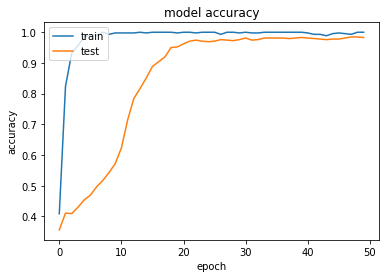

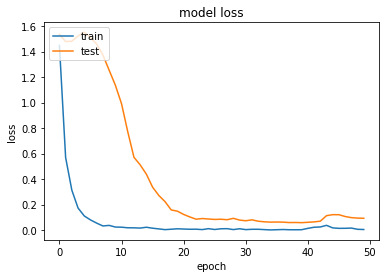

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))


[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.98      0.97      0.97       116
      GMB_02       0.97      0.99      0.98       113
      GMB_03       1.00      0.99      1.00       112
      GMB_04       0.98      0.98      0.98       122
      GMB_05       0.98      0.98      0.98       121

    accuracy                           0.98       584
   macro avg       0.98      0.98      0.98       584
weighted avg       0.98      0.98      0.98       584



In [17]:
model.save('nnmodel_daun_safira')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun_safira/assets


In [32]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_121915_HDR.jpg'

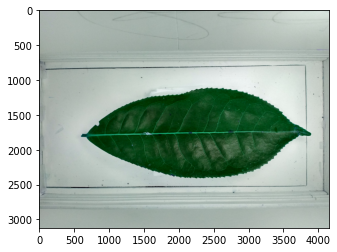

In [33]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [34]:
image_testing = Image.open('IMG_20200814_121915_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [35]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [36]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[6.5781525e-05 6.5541622e-05 1.2404831e-05 5.7679983e-05 9.9979860e-01]]
['GMB_05']
